<a href="https://colab.research.google.com/github/twinkle844/ANALYSING-STROKE-PREDICTION-USING-DIFFERENT-MACHINE-LEARNING-ALGORITHMS/blob/main/SPUMLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALYSING STROKE PREDICTION USING DIFFERENT MACHINE LEARNING ALGORITHMS**

Here we will be describing step-by-step procedure for building a **Machine Learning (ML) Model** for stroke prediction and analysing which features are most useful for the prediction. The packages used in this notebook are:

**IMPORTING RELEVENT PACKAGES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install dataprep

     |████████████████████████████████| 9.5 MB 14.0 MB/s 
     |████████████████████████████████| 1.5 MB 41.5 MB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 10.9 MB 43.1 MB/s 
     |████████████████████████████████| 943 kB 60.4 MB/s 
     |████████████████████████████████| 366 kB 51.8 MB/s 
     |████████████████████████████████| 749 kB 61.1 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 965 kB 41.8 MB/s 
     |████████████████████████████████| 1.0 MB 53.8 MB/s 
     |████████████████████████████████| 78 kB 5.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 95 kB 2.5 MB/s 
     |████████████████████████████████| 133 kB 42.7 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 271 kB 46.2 MB/s 
     |█████

In [ ]:
from dataprep.eda import *
from dataprep.eda import plot
from dataprep.eda import plot_correlation
from dataprep.eda import plot_missing

**OPENING THE DATASET**

Understanding the dataset before going deeper into the subsequent process is necessary. Now we will explore the information about the dataset, such as number of samples, presence of missing values, class imbalance, etc.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import package
# open dataset
filename = "/content/drive/MyDrive/data/train_2v.csv"
data = pd.read_csv(filename)
with pd.option_context('expand_frame_repr', False):
    print(data.head())
print("Data shape: {}".format(data.shape))

      id  gender   age  hypertension  heart_disease ever_married     work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
0  30669    Male   3.0             0              0           No      children          Rural              95.12  18.0              NaN       0
1  30468    Male  58.0             1              0          Yes       Private          Urban              87.96  39.2     never smoked       0
2  16523  Female   8.0             0              0           No       Private          Urban             110.89  17.6              NaN       0
3  56543  Female  70.0             0              0          Yes       Private          Rural              69.04  35.9  formerly smoked       0
4  46136    Male  14.0             0              0           No  Never_worked          Rural             161.28  19.1              NaN       0
Data shape: (43400, 12)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB



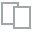
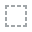
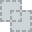
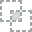
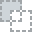
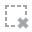
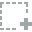
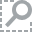
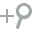
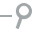
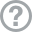
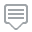
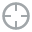
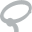
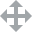
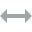
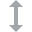
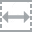
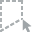
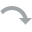
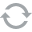
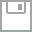
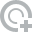
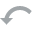
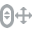
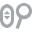
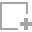
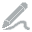
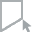
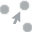
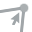
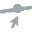

In [ ]:
plot(data)

DataPrep Report
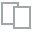
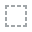
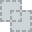
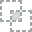
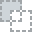
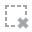
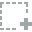
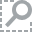
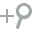
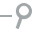
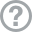
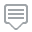
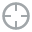
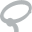
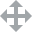
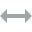
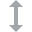
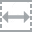
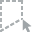
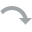
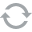
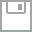
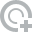
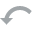
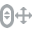
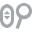
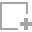
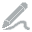
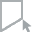
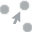
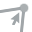
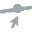

In [ ]:
create_report(data)

In [ ]:
data.describe()

id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.070000     32.900000      0.000000  
max           291.050000     97.600000      1.000000

From above description, we get that the number of rows and columns are  43400 and 12 respectively. There are some missing values (indicated by NaN). Now, we want to check how many missing values exist in each variable.

In [ ]:
miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("# Missing values in variable smoking_status\t: {:.2f}%".format(miss_val['smoking_status']))
print("Data shape: {}".format(data.shape))

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64
# Missing values in variable bmi		: 3.37%
# Missing values in variable smoking_status	: 30.63%
Data shape: (43400, 12)


There are two variables that contain missing values. Firstly, the 'bmi' accounting to 3.37% of overal samples and secondly, the 'smoking_status' accounting to 30.63% of overall samples. To handle these missing values, we will remove the samples from all the variables associated with the indices of missing values in 'smoking_status'. For missing values in 'bmi' variable, we will replace them with the average of 'bmi' values.



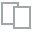
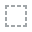
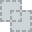
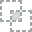
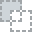
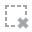
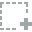
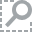
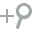
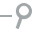
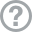
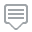
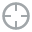
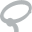
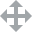
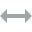
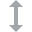
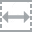
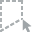
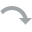
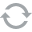
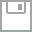
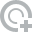
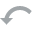
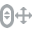
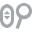
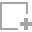
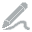
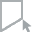
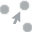
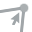
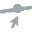

In [ ]:
plot_missing(data)

**HANDLING MISSING VALUES**

In [ ]:
# Safely disable new warning with the chained assignment.
pd.options.mode.chained_assignment = None  # default='warn'
# replace missing values in variable 'bmi' with its mean
data['bmi']=data['bmi'].fillna(data['bmi'].mean())
# remove (drop) data associated with missing values in variable 'smoking_status'
clean_data = data[data['smoking_status'].notnull()]
# drop variable 'id'
clean_data.drop(columns='id',axis=1,inplace=True)
# validate there's no more missing values
miss_val = clean_data.isnull().sum()/len(clean_data)*100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("# Missing values in variable 'smoking_status'\t: {}".format(miss_val['smoking_status']))
print("Shape of data without missing values: {}".format(clean_data.shape))

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
# Missing values in variable 'smoking_status'	: 0.0
Shape of data without missing values: (30108, 11)


**CHANGING CATEGORY TO NUMERICAL VALUES**

As some values as categorial we will have to change them to numerical ones

In [ ]:
print("Unique 'gender': {}".format(clean_data['gender'].unique()))
print("Unique 'ever_married': {}".format(clean_data['ever_married'].unique()))
print("Unique 'work_type': {}".format(clean_data['work_type'].unique()))
print("Unique 'Residence_type': {}".format(clean_data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(clean_data['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['never smoked' 'formerly smoked' 'smokes']


In [ ]:
# create encoder for each categorical variable
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

In [ ]:
clean_data['gender'] = label_gender.fit_transform(clean_data['gender'])
clean_data['ever_married'] = label_married.fit_transform(clean_data['ever_married'])
clean_data['work_type']= label_work.fit_transform(clean_data['work_type'])
clean_data['Residence_type']= label_residence.fit_transform(clean_data['Residence_type'])
clean_data['smoking_status']= label_smoking.fit_transform(clean_data['smoking_status'])
with pd.option_context('expand_frame_repr', False):
    print(clean_data.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level   bmi  smoking_status  stroke
1       1  58.0             1              0             1          2               1              87.96  39.2               1       0
3       0  70.0             0              0             1          2               0              69.04  35.9               0       0
6       0  52.0             0              0             1          2               1              77.59  17.7               0       0
7       0  75.0             0              1             1          3               0             243.53  27.0               1       0
8       0  32.0             0              0             1          2               0              77.67  32.3               2       0


**INTER-FEATURE CORRELATION**

It is sometimes useful to measure the inter-feature correlation. If we find that a feature is highly correlated with the class (target), it could be an indication that this feature is informative about the class. In addition, if a feature is highly correlated with other features, we could remove one of them thus reducing the complexity while potentially improving the model's learning.

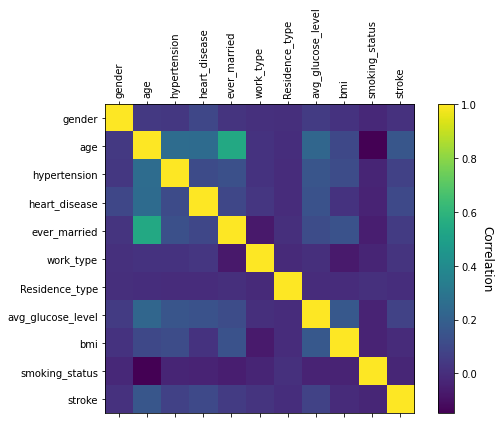

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(clean_data.corr())
ax.set_xticks(np.arange(clean_data.shape[1]))
ax.set_yticks(np.arange(clean_data.shape[1]))
ax.set_xticklabels(clean_data.columns,rotation=90)
ax.set_yticklabels(clean_data.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()

**HISTOGRAM OF FEATURES**

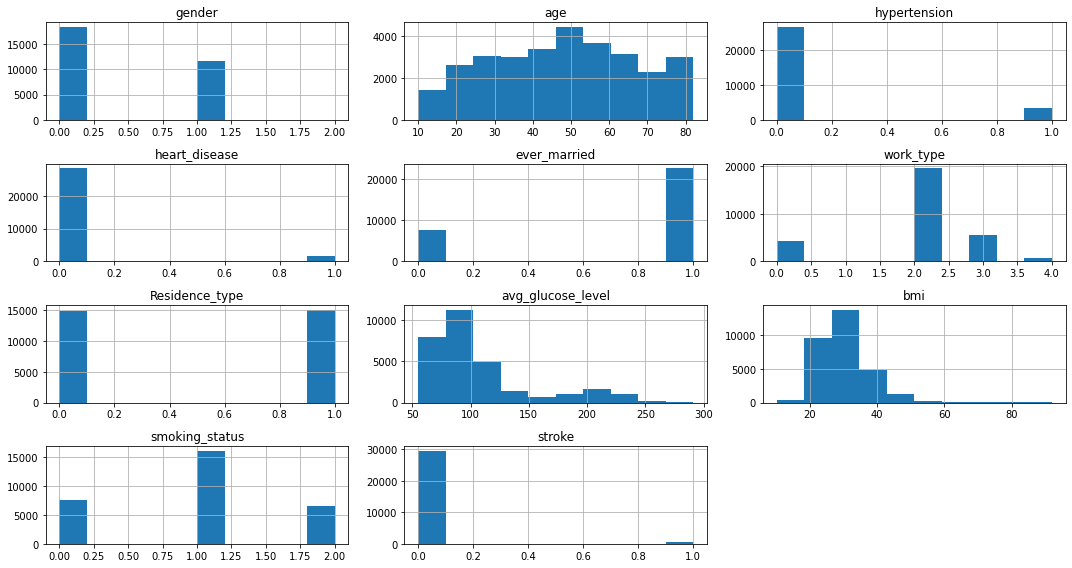

In [ ]:
fig = clean_data.hist(figsize=(15,8))
plt.tight_layout()
plt.show()

**CLASS (TARGET) DISTRIBUTION**

Now, let's have a look at the distribution of class. If the class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.

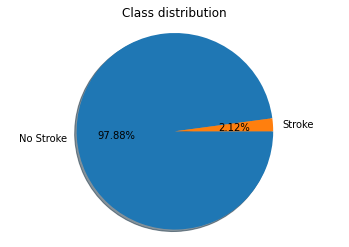

# samples associated with no stroke: 29470
# samples associated with stroke: 638


In [ ]:
class_occur = clean_data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

**DATA PREPROCESSING**

*HANDLING IMBALANCED CLASS*

There are several techniques that can be used to handle highly imbalanced class. This article nicely summarises those different techniques. In this notebook, we are going to use one of oversampling technique called Synthetic Minority Oversampling Technique (SMOTE), by synthesising new samples from the minority class to have the same number of samples as the majority class (illustrated in figure below). Oversampling technique is chosen because we do not want to loose significant amount of information (97.88%) as if we use undersampling technique.

In [ ]:
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(clean_data.loc[:,clean_data.columns!='stroke'], clean_data['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (58940, 10)
Shape of y: (58940,)


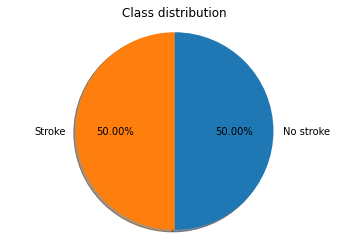

# samples associated with no stroke: 29470
# samples associated with stroke: 29470


In [ ]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

**DATA SPLITTING**

In [ ]:
def split_train_valid_test(X,y,test_size=0.1,random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X,y,test_size=0.1,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0],valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 23576 | # class 1: 23576
[valid] # class 0: 2947 | # class 1: 2947
[test]  # class 0: 2947 | # class 1: 2947


**DATA NORMALIZING**

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

**MODEL TRAINING AND EVALUATION OF MACHINE LEARNING ALGORITHMS**

*Now we will be implementing and benchmarking the performance of the following ML algorithms:*


*PERFORMANCE METRICS*

*The peformance will be evaluated based on two different groups of metrics:*
1.   *Sensitivity, specificity, and area under the curve (AUC)*
2.   *Precision, recall, and F1 score*




In [ ]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

*SUPPORT VECTOR MACHINE (SVM)*

In [ ]:
start = timer.time()
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

# Predicting the test set results
y_svm = svm_model.predict(X_test_std)
y_svm_prob = svm_model.predict_proba(X_test_std)

Finished training within 466.85 seconds


In [ ]:
print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_svm)))


Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2947
           1       0.81      0.88      0.85      2947

    accuracy                           0.84      5894
   macro avg       0.84      0.84      0.84      5894
weighted avg       0.84      0.84      0.84      5894

Confusion matrix for SVM: 
[[2352  595]
 [ 349 2598]]
Accuracy score for SVM: 0.84


In [ ]:
# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

Precision score for SVM: 0.81
Recall score for SVM: 0.88
F1 score for SVM: 0.85


Sensitivity score for SVM: 0.88
Specitivity score for SVM: 0.80
AUC score for SVM: 0.91


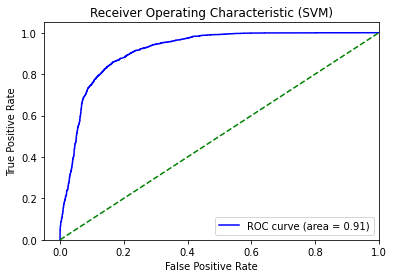

In [ ]:
# calculate sensitivity, specificity, and auc
sens_svm,spec_svm = calc_sens_spec(y_test,y_svm)
fpr, tpr, _ = roc_curve(y_test,  y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specitivity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
plt.show()

*GAUSSIAN NAIVE BAYES (GNB)*

In [ ]:
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

# Predicting the test set results
y_gnb = gnb_model.predict(X_test_std)
y_gnb_prob = gnb_model.predict_proba(X_test_std)

Finished training within 0.02 seconds


In [ ]:
print("Classification report for GNB: \n{}".format(classification_report(y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(y_test,y_gnb)))

Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      2947
           1       0.75      0.82      0.78      2947

    accuracy                           0.77      5894
   macro avg       0.78      0.77      0.77      5894
weighted avg       0.78      0.77      0.77      5894

Confusion matrix for GNB: 
[[2158  789]
 [ 543 2404]]
Accuracy score for GNB: 0.77


In [ ]:
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(y_test,y_gnb)
rec_gnb = recall_score(y_test,y_gnb)
f1_gnb = f1_score(y_test,y_gnb)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

Precision score for GNB: 0.75
Recall score for GNB: 0.82
F1 score for GNB: 0.78


Sensitivity score for GNB: 0.82
Specitivity score for GNB: 0.73
AUC score for GNB: 0.85


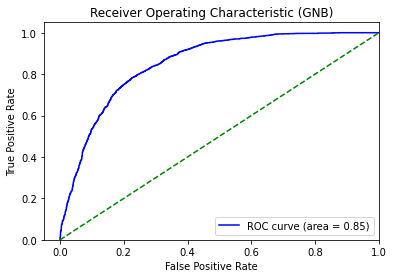

In [ ]:
# calculate sensitivity, specificity, and auc
sens_gnb,spec_gnb = calc_sens_spec(y_test,y_gnb)
fpr, tpr, _ = roc_curve(y_test,  y_gnb_prob[:,1])
auc_gnb = roc_auc_score(y_test, y_gnb_prob[:,1])
print("Sensitivity score for GNB: {:.2f}".format(sens_gnb))
print("Specitivity score for GNB: {:.2f}".format(spec_gnb))
print("AUC score for GNB: {:.2f}".format(auc_gnb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
plt.show()

*LOGISTIC REGRESSION (LR)*

In [ ]:
start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

# Predicting the test set results
y_logit = logit_model.predict(X_test_std)
y_logit_prob = logit_model.predict_proba(X_test_std)

Finished training within 0.09 seconds


In [ ]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))

Classification report for LR: 
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2947
           1       0.77      0.81      0.79      2947

    accuracy                           0.79      5894
   macro avg       0.79      0.79      0.79      5894
weighted avg       0.79      0.79      0.79      5894

Confusion matrix for LR: 
[[2243  704]
 [ 548 2399]]
Accuracy score for LR: 0.79


In [ ]:
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)

print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))

Precision score for LR: 0.77
Recall score for LR: 0.81
F1 score for LR: 0.79


Sensitivity score for LR: 0.81
Specitivity score for LR: 0.76
AUC score for LR: 0.87


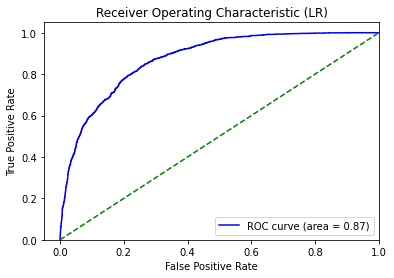

In [ ]:
# calculate sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)
fpr, tpr, _ = roc_curve(y_test,  y_logit_prob[:,1])
auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])

print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))

fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

*DECISION TREE (DT)*

In [ ]:
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

# Predicting the test set results
y_dtree = dtree_model.predict(X_test_std)
y_dtree_prob = dtree_model.predict_proba(X_test_std)

Finished training within 0.28 seconds


In [ ]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))

Classification report for DT: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2947
           1       0.93      0.95      0.94      2947

    accuracy                           0.94      5894
   macro avg       0.94      0.94      0.94      5894
weighted avg       0.94      0.94      0.94      5894

Confusion matrix for DT: 
[[2751  196]
 [ 138 2809]]
Accuracy score for DT: 0.94


In [ ]:
# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)

print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))

Precision score for DT: 0.93
Recall score for DT: 0.95
F1 score for DT: 0.94


Sensitivity score for DT: 0.95
Specitivity score for DT: 0.93
AUC score for DT: 0.94


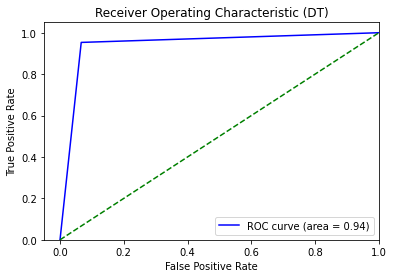

In [ ]:
# calculate sensitivity, specificity, and auc
sens_dtree,spec_dtree = calc_sens_spec(y_test,y_dtree)
fpr, tpr, _ = roc_curve(y_test,  y_dtree_prob[:,1])
auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])

print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specitivity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))

fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()

*RANDOM FOREST ALGORITHM (RFA)*

In [ ]:
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_std)

Finished training within 6.60 seconds


In [ ]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))

Classification report for RF: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2947
           1       0.96      0.98      0.97      2947

    accuracy                           0.97      5894
   macro avg       0.97      0.97      0.97      5894
weighted avg       0.97      0.97      0.97      5894

Confusion matrix for RF: 
[[2830  117]
 [  63 2884]]
Accuracy score for RF: 0.97


In [ ]:
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)

print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))

Precision score for RF: 0.96
Recall score for RF: 0.98
F1 score for RF: 0.97


Sensitivity score for RF: 0.98
Specitivity score for RF: 0.96
AUC score for RF: 1.00


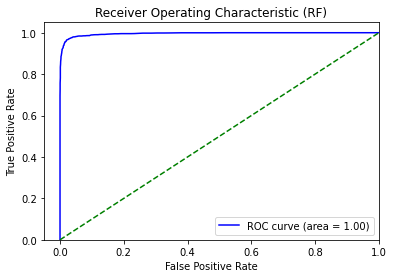

In [ ]:
# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)
fpr, tpr, _ = roc_curve(y_test,  y_ranfor_prob[:,1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])

print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))

fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

*LightGBM (LGBM)*

In [ ]:
start = timer.time()
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

# Predicting the test set results
y_lgbm = lgbm_model.predict(X_test_std)
y_lgbm_prob = lgbm_model.predict_proba(X_test_std)

Finished training within 0.64 seconds


In [ ]:
print("Classification report for LGBM: \n{}".format(classification_report(y_test,y_lgbm)))
print("Confusion matrix for LGBM: \n{}".format(confusion_matrix(y_test,y_lgbm)))
print("Accuracy score for LGBM: {:.2f}".format(accuracy_score(y_test,y_lgbm)))

Classification report for LGBM: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2947
           1       0.93      0.95      0.94      2947

    accuracy                           0.94      5894
   macro avg       0.94      0.94      0.94      5894
weighted avg       0.94      0.94      0.94      5894

Confusion matrix for LGBM: 
[[2739  208]
 [ 149 2798]]
Accuracy score for LGBM: 0.94


In [ ]:
# calculate precision, recall, and f1 scores
prec_lgbm = precision_score(y_test,y_lgbm)
rec_lgbm = recall_score(y_test,y_lgbm)
f1_lgbm = f1_score(y_test,y_lgbm)

print("Precision score for LGBM: {:.2f}".format(prec_lgbm))
print("Recall score for LGBM: {:.2f}".format(rec_lgbm))
print("F1 score for LGBM: {:.2f}".format(f1_lgbm))

Precision score for LGBM: 0.93
Recall score for LGBM: 0.95
F1 score for LGBM: 0.94


Sensitivity score for LGBM: 0.95
Specitivity score for LGBM: 0.93
AUC score for LGBM: 0.99


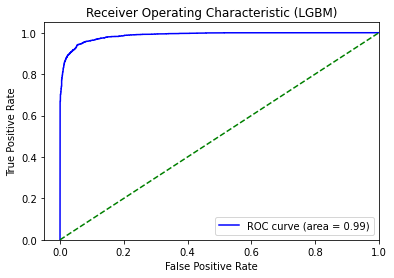

In [ ]:
# calculate sensitivity, specificity, and auc
sens_lgbm,spec_lgbm = calc_sens_spec(y_test,y_lgbm)
fpr, tpr, _ = roc_curve(y_test,  y_lgbm_prob[:,1])
auc_lgbm = roc_auc_score(y_test, y_lgbm_prob[:,1])

print("Sensitivity score for LGBM: {:.2f}".format(sens_lgbm))
print("Specitivity score for LGBM: {:.2f}".format(spec_lgbm))
print("AUC score for LGBM: {:.2f}".format(auc_lgbm))

fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_lgbm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LGBM)')
ax.legend(loc="lower right")
plt.show()

*XGBoost (XGB)*

In [ ]:
start = timer.time()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

# Predicting the test set results
y_xgb = xgb_model.predict(X_test_std)
y_xgb_prob = xgb_model.predict_proba(X_test_std)

Finished training within 2.76 seconds


In [ ]:
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_xgb)))
print("Accuracy score for XGB: {:.2f}".format(accuracy_score(y_test,y_xgb)))

Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2947
           1       0.82      0.89      0.85      2947

    accuracy                           0.85      5894
   macro avg       0.85      0.85      0.85      5894
weighted avg       0.85      0.85      0.85      5894

Confusion matrix for XGB: 
[[2379  568]
 [ 333 2614]]
Accuracy score for XGB: 0.85


In [ ]:
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)

print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))

Precision score for XGB: 0.82
Recall score for XGB: 0.89
F1 score for XGB: 0.85


Sensitivity score for XGB: 0.89
Specitivity score for XGB: 0.81
AUC score for XGB: 0.93


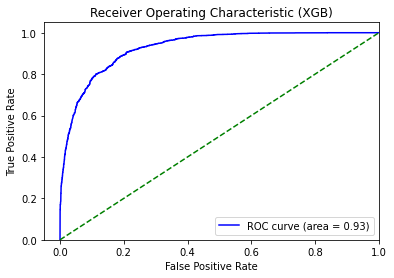

In [ ]:
# calculate sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test,y_xgb)
fpr, tpr, _ = roc_curve(y_test,  y_xgb_prob[:,1])
auc_xgb = roc_auc_score(y_test, y_xgb_prob[:,1])

print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))

fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGB)')
ax.legend(loc="lower right")
plt.show()

*K-NEAREST NEIGHBOUR (KNN)*

In [ ]:
start = timer.time()
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_KNC = classifier.fit(X_train, y_train).predict(X_test_std)
y_KNC_prob = classifier.fit(X_train, y_train).predict_proba(X_test_std)

Finished training within 0.09 seconds


In [ ]:
print("Classification report for KNN: \n{}".format(classification_report(y_test,y_KNC)))
print("Confusion matrix for KNN: \n{}".format(confusion_matrix(y_test,y_KNC)))
print("Accuracy score for KNN: {:.2f}".format(accuracy_score(y_test,y_KNC)))

Classification report for KNN: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2947
           1       0.00      0.00      0.00      2947

    accuracy                           0.50      5894
   macro avg       0.25      0.50      0.33      5894
weighted avg       0.25      0.50      0.33      5894

Confusion matrix for KNN: 
[[2947    0]
 [2947    0]]
Accuracy score for KNN: 0.50


In [ ]:
# calculate precision, recall, and f1 scores
prec_KNC = precision_score(y_test,y_KNC)
print("Precision score for KNN: {:.2f}".format(prec_KNC))

Precision score for KNN: 0.00


In [ ]:
# calculate precision, recall, and f1 scores
rec_KNC = recall_score(y_test,y_KNC)
print("Recall score for KNN: {:.2f}".format(rec_KNC))

Recall score for KNN: 0.00


In [ ]:
# calculate precision, recall, and f1 scores
f1_KNC = f1_score(y_test,y_KNC)
print("F1 score for KNN: {:.2f}".format(f1_KNC))

F1 score for KNN: 0.00


Sensitivity score for KNN: 0.00
Specitivity score for KNN: 1.00
AUC score for KNN: 0.50


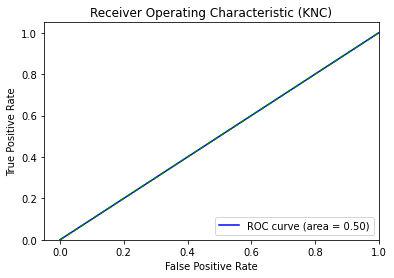

In [ ]:
# calculate sensitivity, specificity, and auc
sens_KNC,spec_KNC = calc_sens_spec(y_test,y_KNC)
fpr, tpr, _ = roc_curve(y_test,  y_KNC_prob[:,1])
auc_KNC = roc_auc_score(y_test, y_KNC_prob[:,1])

print("Sensitivity score for KNN: {:.2f}".format(sens_KNC))
print("Specitivity score for KNN: {:.2f}".format(spec_KNC))
print("AUC score for KNN: {:.2f}".format(auc_KNC))

fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_KNC)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (KNC)')
ax.legend(loc="lower right")
plt.show()

*SGD CLASSIFIER*

In [ ]:
start = timer.time()
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
sgdc.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

# Predicting the test set results
y_sgdc = sgdc.fit(X_train, y_train).predict(X_test_std)
ypred = sgdc.predict(X_test)

Finished training within 1.94 seconds


In [ ]:
cr = classification_report(y_sgdc, ypred)
print(cr)
print("Accuracy score for sgdc: {:.2f}".format(accuracy_score(y_sgdc,ypred)))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61      5894
           1       0.00      0.00      0.00         0

    accuracy                           0.44      5894
   macro avg       0.50      0.22      0.31      5894
weighted avg       1.00      0.44      0.61      5894

Accuracy score for sgdc: 0.44


In [ ]:
# calculate precision, recall, and f1 scores
prec_sgdc = precision_score(y_test,y_sgdc)
rec_sgdc = recall_score(y_test,y_sgdc)
f1_sgdc = f1_score(y_test,y_sgdc)

print("Precision score for sgdc: {:.2f}".format(prec_sgdc))
print("Recall score for sgdc: {:.2f}".format(rec_sgdc))
print("F1 score for sgdc: {:.2f}".format(f1_sgdc))

Precision score for sgdc: 0.00
Recall score for sgdc: 0.00
F1 score for sgdc: 0.00


In [ ]:
# calculate sensitivity, specificity
sens_sgdc,spec_sgdc = calc_sens_spec(y_test,y_sgdc)
print("Sensitivity score for sgdc: {:.2f}".format(sens_sgdc))
print("Specitivity score for sgdc: {:.2f}".format(spec_sgdc))

Sensitivity score for sgdc: 0.00
Specitivity score for sgdc: 1.00


*AdaBoost CLASSIFIER*

In [ ]:
start = timer.time()
abc = AdaBoostClassifier(n_estimators=2000, random_state = 0)
model = abc.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

#Predict the response for test dataset
y_abc = model.predict(X_test_std)
y_abc_prob = model.predict_proba(X_test_std)

Finished training within 81.48 seconds


In [ ]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_abc))

AdaBoost Classifier Model Accuracy: 0.5


In [ ]:
# calculate precision, recall, and f1 scores
prec_abc = precision_score(y_test,y_abc)
rec_abc = recall_score(y_test,y_abc)
f1_abc = f1_score(y_test,y_abc)

print("Precision score for XGB: {:.2f}".format(prec_abc))
print("Recall score for XGB: {:.2f}".format(rec_abc))
print("F1 score for XGB: {:.2f}".format(f1_abc))

Precision score for XGB: 0.00
Recall score for XGB: 0.00
F1 score for XGB: 0.00


Sensitivity score for abc: 0.00
Specitivity score for abc: 1.00
AUC score for abc: 0.57


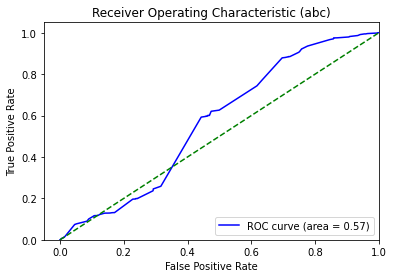

In [ ]:
# calculate sensitivity, specificity, and auc
sens_abc,spec_abc = calc_sens_spec(y_test,y_abc)
fpr, tpr, _ = roc_curve(y_test,  y_abc_prob[:,1])
auc_abc = roc_auc_score(y_test, y_abc_prob[:,1])

print("Sensitivity score for abc: {:.2f}".format(sens_abc))
print("Specitivity score for abc: {:.2f}".format(spec_abc))
print("AUC score for abc: {:.2f}".format(auc_abc))

fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_abc)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (abc)')
ax.legend(loc="lower right")
plt.show()

*PERFORMANCE BENCHMARK ACROSS MODELS*

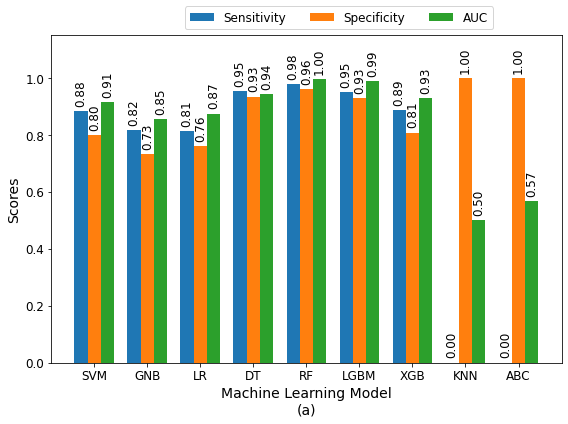

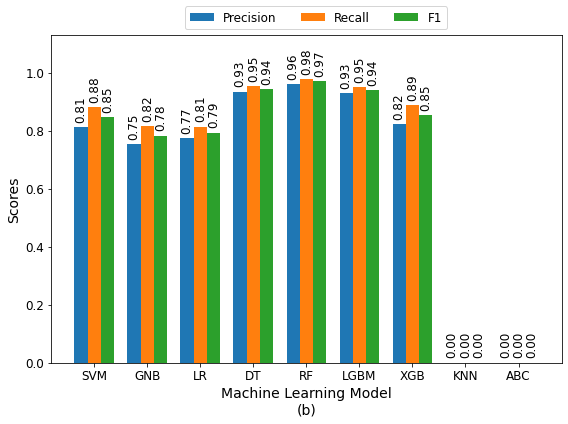

In [ ]:
ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'LGBM', 'XGB', 'KNN','ABC']
sens_all = [sens_svm, sens_gnb, sens_logit, sens_dtree, sens_ranfor, sens_lgbm, sens_xgb, sens_KNC, sens_abc]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_dtree, spec_ranfor, spec_lgbm, spec_xgb, spec_KNC, spec_abc]
auc_all = [auc_svm, auc_gnb, auc_logit, auc_dtree, auc_ranfor, auc_lgbm, auc_xgb, auc_KNC, auc_abc]

prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_ranfor, prec_lgbm, prec_xgb, prec_KNC, prec_abc]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_ranfor, rec_lgbm, rec_xgb, rec_KNC, rec_abc]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_dtree, f1_ranfor, f1_lgbm, f1_xgb, f1_KNC, f1_abc]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.15])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(a)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
plt.show()

# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()


**SELECTING MOST IMPORTANT FREATURES**

*To evaluate the most important features, we will use feature importance score which can be calculated using two different methods as follows:*

1.   *Tree based feature importance. This is calculated during the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees indicates higher relative importance. This can be access by using featureimportances attribute within the model.*
2.   *Permutation based feature importance. First, we compute the baseline performance of the original trained model (without permutation) using the testing set; Second, for each feature, we permute the data in that feature, compute and record the performance based on the permuted data; lastly, compute the feature importance as the difference between the baseline performance and the performance based on the permuted data.*


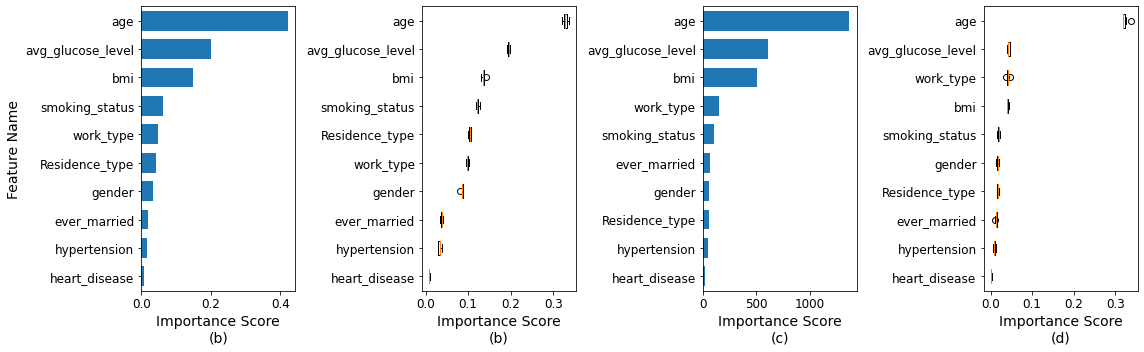

In [ ]:
# feature importance from random forest
feature_names = clean_data.columns[:-1].to_numpy()
ranfor_perm_imp = permutation_importance(ranfor_model, X_test_std, y_test, n_repeats=10, random_state=42)
ranfor_perm_sort_idx = ranfor_perm_imp.importances_mean.argsort()

ranfor_tree_sort_idx = np.argsort(ranfor_model.feature_importances_)
ranfor_indices = np.arange(0, len(ranfor_model.feature_importances_)) + 0.5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))
ax1.barh(ranfor_indices,ranfor_model.feature_importances_[ranfor_tree_sort_idx], height=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Importance Score\n(b)",fontsize=14)
ax1.set_ylabel("Feature Name",fontsize=14)
ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
ax1.set_yticks(ranfor_indices)
ax1.set_ylim((0, len(ranfor_model.feature_importances_)))
ax2.boxplot(ranfor_perm_imp.importances[ranfor_perm_sort_idx].T,vert=False,labels=feature_names[ranfor_perm_sort_idx])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel("Importance Score\n(b)",fontsize=14)


# feature importance from LGBM
lgbm_perm_imp = permutation_importance(lgbm_model, X_test_std, y_test, n_repeats=10, random_state=42)
lgbm_perm_sort_idx = lgbm_perm_imp.importances_mean.argsort()

lgbm_tree_sort_idx = np.argsort(lgbm_model.feature_importances_)
lgbm_indices = np.arange(0, len(lgbm_model.feature_importances_)) + 0.5

ax3.barh(lgbm_indices,lgbm_model.feature_importances_[lgbm_tree_sort_idx], height=0.7)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_xlabel("Importance Score\n(c)",fontsize=14)
ax3.set_yticklabels(feature_names[lgbm_tree_sort_idx])
ax3.set_yticks(lgbm_indices)
ax3.set_ylim((0, len(lgbm_model.feature_importances_)))
ax4.boxplot(lgbm_perm_imp.importances[lgbm_perm_sort_idx].T,vert=False,labels=feature_names[lgbm_perm_sort_idx])
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.set_xlabel("Importance Score\n(d)",fontsize=14)


fig.tight_layout()
fig.savefig("feature_importance.pdf", bbox_inches='tight')
plt.show()

*In summary, two highest stroke prediction performance were achieved by **RANDOM FOREST and LGBM Algorithms** ; three most important features (in descending order) for stroke prediction were 'age', 'avg_glucose_level', and 'bmi'*